In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import string
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [3]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true["catagory"] = 1
fake["catagory"] = 0

In [6]:
df =pd.concat([true,fake])


In [7]:
df.sample(8)

,title,text,subject,date,catagory
4380,BUSTED: Donald Trump Screwed Over American St...,Donald Trump claims he will make America grea...,News,"October 3, 2016",0
7027,WATCH: Donald Trump Receives Endorsement From...,Donald Trump has attracted all sorts of fringe...,News,"April 8, 2016",0
5890,Factbox: What's in Trump's order halting refug...,(Reuters) - U.S. President Donald Trump said o...,politicsNews,"January 28, 2017",1
6350,Kerry says he's confident Trump administration...,HO CHI MINH CITY (Reuters) - Outgoing U.S. Sec...,politicsNews,"January 13, 2017",1
8658,Track Palin Faces Assault And Weapons Charges...,It s no secret that the Palin family are fans ...,News,"January 19, 2016",0
19590,"Russia becomes Iraq Kurds' top funder, quiet a...","LONDON (Reuters) - Russia, the only major powe...",worldnews,"September 20, 2017",1
7967,"Kansas, ACLU reach temporary agreement on vote...",(Reuters) - The Kansas Secretary of State and ...,politicsNews,"September 29, 2016",1
10410,"BREAKING: PETER W. SMITH, GOP Operative Who So...",The plot thickens Republican donor and operati...,politics,"Jul 13, 2017",0


<AxesSubplot:xlabel='catagory', ylabel='count'>

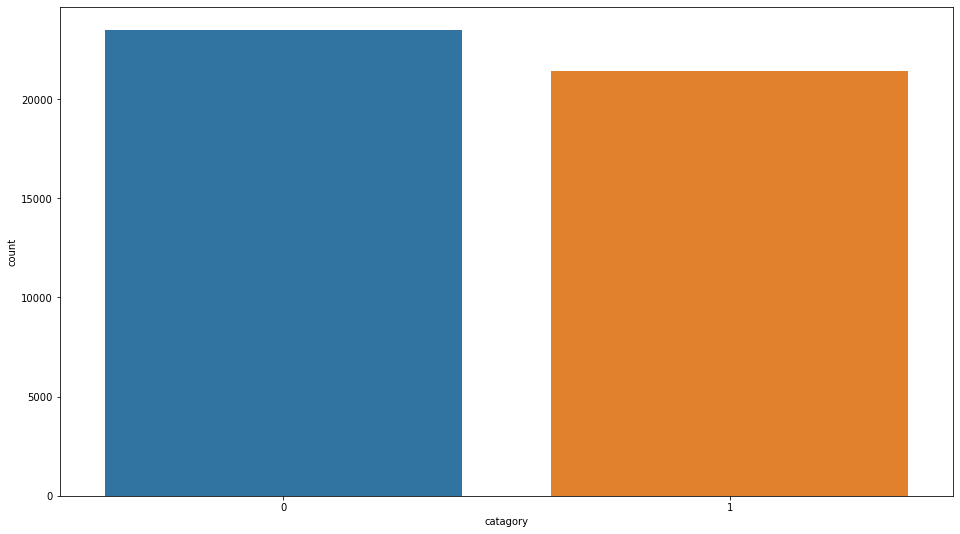

In [8]:
plt.figure(figsize = (16,9))
sns.countplot(df.catagory)

In [9]:
true.shape, fake.shape

((21417, 5), (23481, 5))

In [10]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

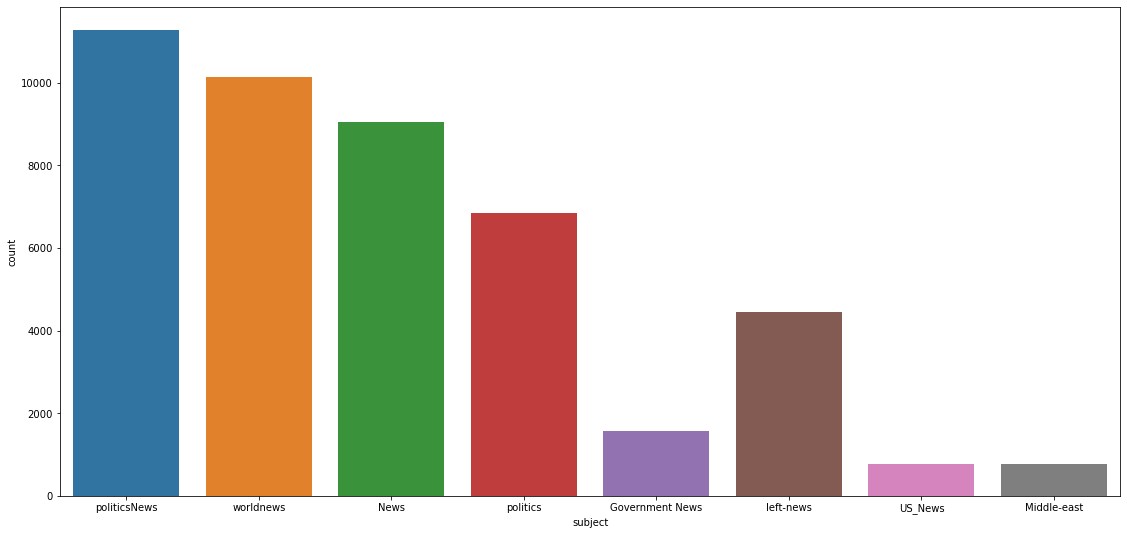

In [11]:
plt.figure(figsize = (19,9))
sns.countplot(x= "subject", data = df)

<AxesSubplot:xlabel='subject', ylabel='count'>

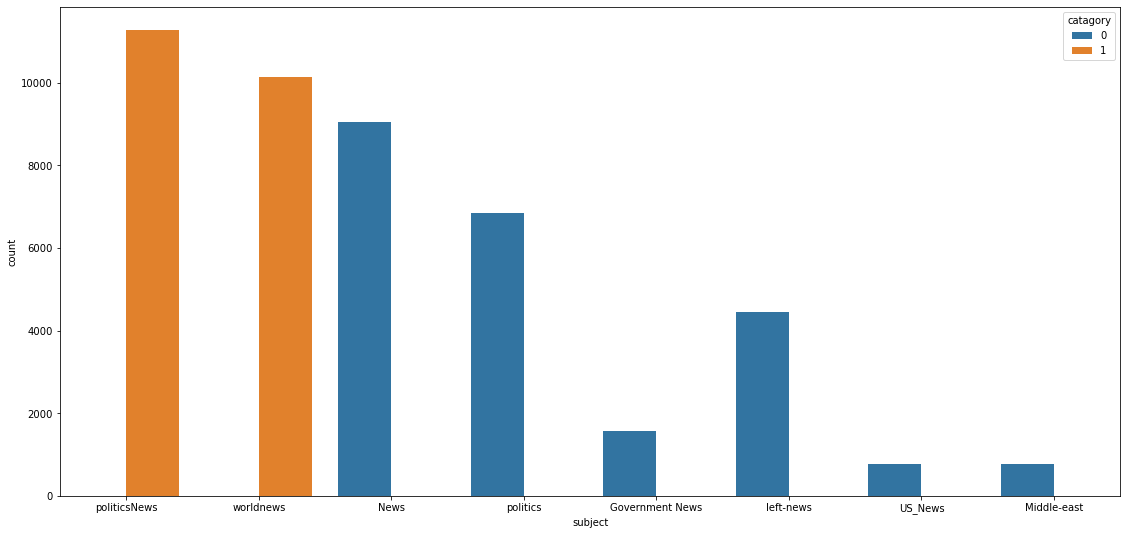

In [12]:
plt.figure(figsize = (19,9))
sns.countplot(x= "subject", hue = "catagory",data = df)

In [13]:
df.columns

Index(['title', 'text', 'subject', 'date', 'catagory'], dtype='object')

In [14]:
df.drop(["title", "subject", "date"], axis = 1, inplace = True)

In [15]:
df.isnull().sum()

text        0
catagory    0
dtype: int64

In [16]:
 df =df.sample(frac = 1)

In [17]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [18]:
df.head(15)

,text,catagory
0,"Apparently, male Tennessee Republican lawmaker...",0
1,There were a lot of arguments online after the...,0
2,When Ella Dawson started a blog discussing her...,0
3,Conservative Christian leaders who still sup...,0
4,"After years and even decades in some cases, th...",0
5,UNITED NATIONS (Reuters) - United Nations offi...,1
6,WASHINGTON (Reuters) - U.S. President Donald T...,1
7,If there s one person who definitely doesn t w...,0
8,"OOSTKAMP, Belgium (Reuters) - Catalonia s form...",1
9,"Former Navy SEAL and GOP Rep. Scott Taylor, R-...",0


In [19]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [20]:
df["text"] = df["text"].apply(word_drop)

In [21]:
stop = set(stopwords.words('english'))

In [22]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [23]:
df["text"] = df["text"].apply(remove_stopwords)

In [24]:
print(df['text'])

0        apparently male tennessee republican lawmakers...
1        lot arguments online fearless girl statue erec...
2        ella dawson started blog discussing trials gen...
3        conservative christian leaders still support d...
4        years even decades cases throngs women decided...
                               ...                        
44893    washington reuters trump administration midst ...
44894    honolulu reuters one three federal appeals cou...
44895    berlin reuters far right alternative germany a...
44896    reuters louisiana legislature wednesday passed...
44897    mexico city reuters mexico foreign minister sa...
Name: text, Length: 44898, dtype: object


In [ ]:
df.head()

In [26]:
df.isnull().sum()

text        0
catagory    0
dtype: int64

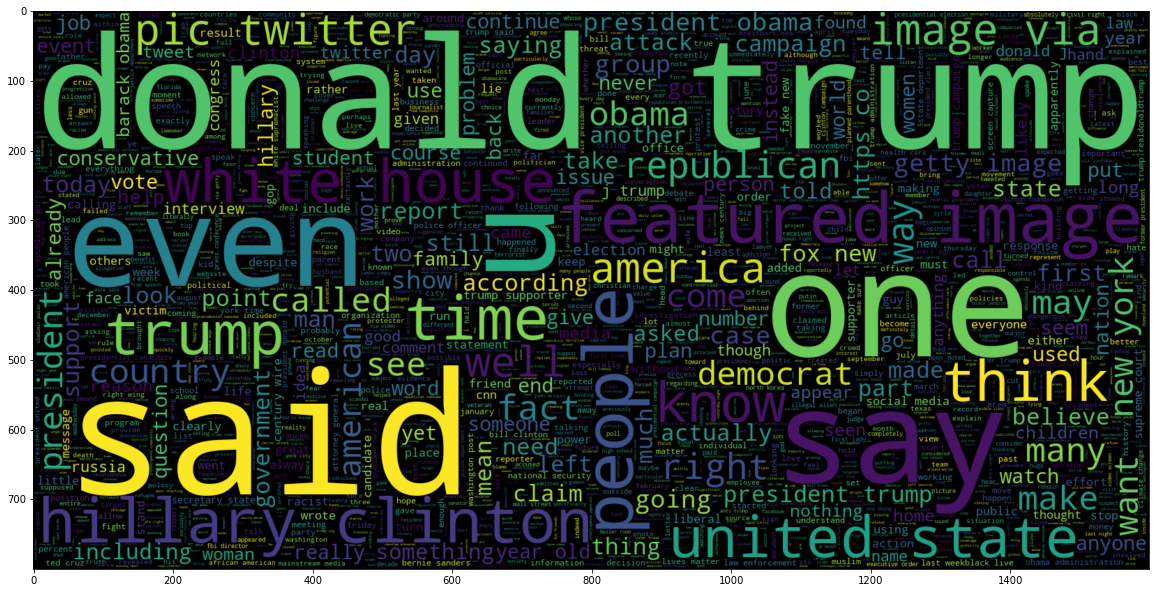

In [27]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.catagory == 0].text))
plt.imshow(wc, interpolation = 'bilinear')

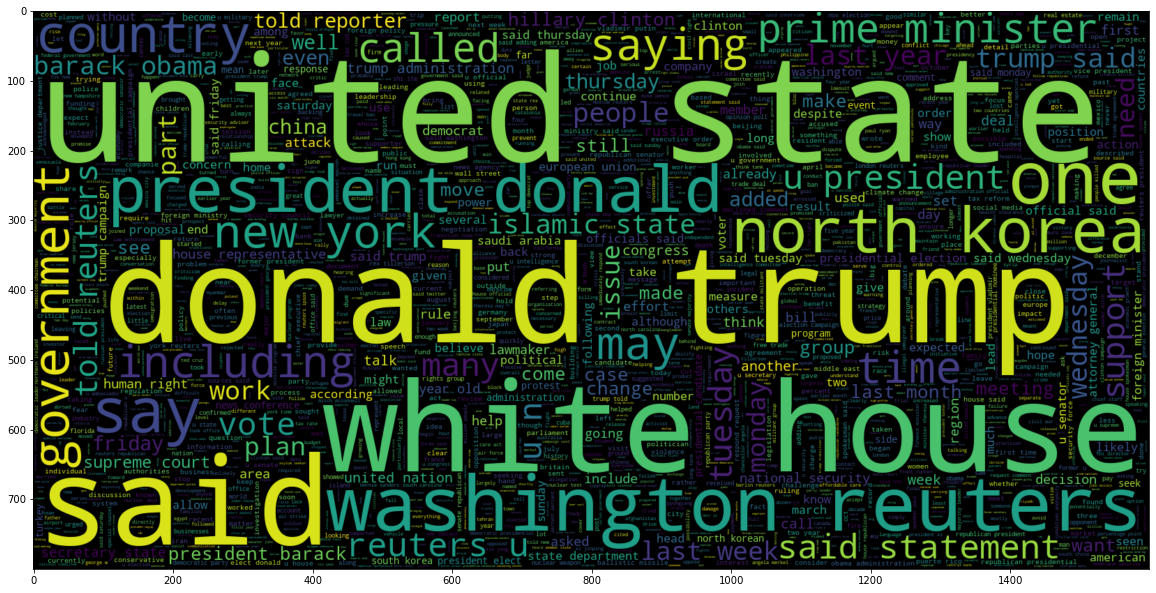

In [28]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.catagory == 1].text))
plt.imshow(wc, interpolation = 'bilinear')

In [29]:
x = df["text"]
y = df["catagory"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [35]:
Predict_LR = LR.predict(xv_test)

In [36]:
LR.score(xv_test, y_test)

0.9841425389755011

In [37]:
print(classification_report(y_test, Predict_LR))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5836
           1       0.98      0.98      0.98      5389

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [38]:
cf_matrix = confusion_matrix(y_test, Predict_LR)

print(cf_matrix)

[[5746   90]
 [  88 5301]]


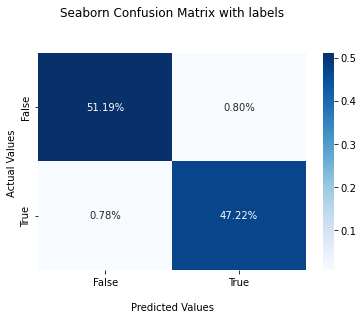

In [39]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
GBC = GradientBoostingClassifier(random_state = 0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [42]:
pred_gbc = GBC.predict(xv_test)

In [43]:
GBC.score(xv_test, y_test)

0.9957238307349666

In [44]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5836
           1       0.99      1.00      1.00      5389

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [45]:
cf_matrix = confusion_matrix(y_test, pred_gbc)

print(cf_matrix)

[[5799   37]
 [  11 5378]]


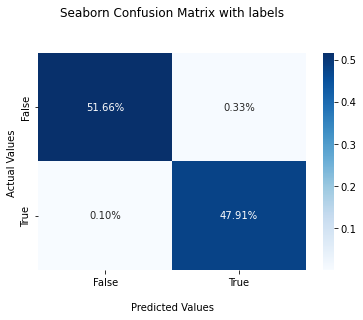

In [46]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
DTC = DecisionTreeClassifier()
DTC.fit(xv_train, y_train)

DecisionTreeClassifier()

In [49]:
DTC.score(xv_test, y_test)

0.995902004454343

In [50]:
pred_dtc = DTC.predict(xv_test)

In [89]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5836
           1       1.00      1.00      1.00      5389

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [52]:
cf_matrix = confusion_matrix(y_test, pred_dtc)

print(cf_matrix)

[[5812   24]
 [  22 5367]]


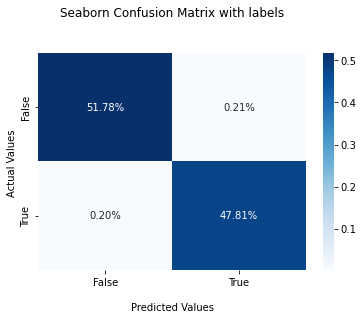

In [53]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [56]:
RFC.score(xv_test, y_test)

0.9890423162583519

In [57]:
pred_rfc = RFC.predict(xv_test)

In [58]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5836
           1       0.99      0.99      0.99      5389

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [59]:
cf_matrix = confusion_matrix(y_test, pred_rfc)

print(cf_matrix)

[[5767   69]
 [  54 5335]]


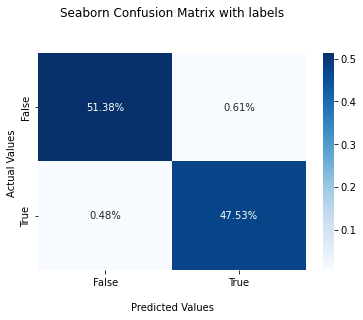

In [60]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [61]:
from sklearn import svm

In [62]:
cls = svm.SVC(kernel="linear")

In [63]:
cls.fit(xv_train,y_train)

SVC(kernel='linear')

In [64]:
cls.score(xv_test, y_test)

0.9935857461024499

In [65]:
pred_svm = cls.predict(xv_test)

In [66]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5836
           1       0.99      0.99      0.99      5389

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [67]:
cf_matrix = confusion_matrix(y_test, pred_svm)

print(cf_matrix)

[[5797   39]
 [  33 5356]]


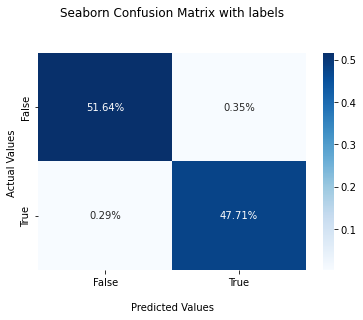

In [68]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [69]:
from sklearn.linear_model import SGDClassifier

In [70]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [71]:
clf.fit(xv_train, y_train)

SGDClassifier(max_iter=5)

In [72]:
clf.score(xv_test, y_test)

0.9895768374164811

In [73]:
pred_clf = clf.predict(xv_test)

In [74]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5836
           1       0.99      0.99      0.99      5389

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [75]:
cf_matrix = confusion_matrix(y_test, pred_clf)

print(cf_matrix)

[[5769   67]
 [  50 5339]]


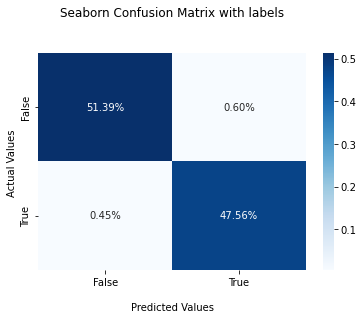

In [76]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

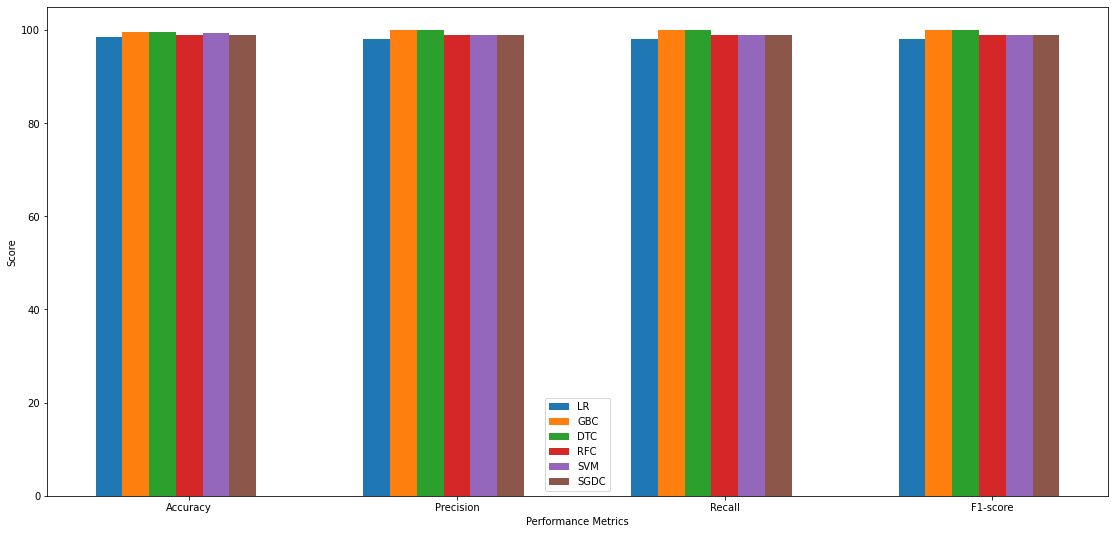

In [118]:
w = 0.1
X = ["Accuracy", "Precision", "Recall", "F1-score"]
LR = [98.41, 98, 98, 98]
GBC = [99.57, 100, 100, 100]
DTC = [99.59, 100, 100, 100]
RFC = [98.9, 99, 99 ,99]
SVM = [99.35, 99, 99, 99 ]
SGDC = [98.9, 99,99,99]
bar1 = np.arange(len(X))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]
bar5 = [i+w for i in bar4]
bar6 = [i+w for i in bar5]
plt.figure(figsize=(19,9))
plt.bar(bar1,LR,w,label="LR")
plt.bar(bar2,GBC,w,label="GBC")
plt.bar(bar3,DTC,w,label="DTC")
plt.bar(bar4,RFC,w,label="RFC")
plt.bar(bar5,SVM,w,label="SVM")
plt.bar(bar6,SGDC,w,label="SGDC")
plt.xlabel("Performance Metrics")
plt.ylabel("Score")
plt.legend()
plt.xticks(bar4,X)
plt.show()